# ベクトルとベクトル空間


$$
% 太字のalias
\newcommand{\b}[1]{\boldsymbol{#1}}
$$

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

## ベクトル

数を並べた組をベクトルという。

$$
\boldsymbol{a} = (a_1, a_2, a_3)
$$

## ベクトルの演算

2つの$n$次元ベクトル

$$
\b{a} =
\begin{pmatrix}
    a_1\\
    \vdots\\
    a_n
\end{pmatrix}
, \hspace{2em}
\b{b} =
\begin{pmatrix}
    b_1\\
    \vdots\\
    b_n
\end{pmatrix}
$$

とスカラー$c$があるとする。


### 足し算

ベクトル$\b{a},\b{b}$の足し算を次のように定義する

$$
\b{a}+\b{b} = 
\begin{pmatrix}
    a_1\\
    \vdots\\
    a_n
\end{pmatrix}
+
\begin{pmatrix}
    b_1\\
    \vdots\\
    b_n
\end{pmatrix}
=
\begin{pmatrix}
    a_1 + b_1\\
    \vdots\\
    a_n + b_n
\end{pmatrix}
$$

### スカラー倍

ベクトル$\b{a}$のスカラー$c$倍を次のように定義する

$$
c \b{a} = 
\begin{pmatrix}
    c a_1\\
    \vdots\\
    c a_n
\end{pmatrix}
$$


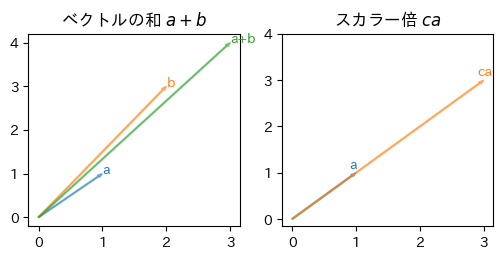

In [124]:
a = np.array([1, 1])
b = np.array([2, 3])
o = np.array([0, 0])
c = 3

fig, axes = plt.subplots(ncols=2, figsize=[6, 2.5])

# 和
ax = axes[0]
cmap = mpl.colormaps['tab10']
for i, (v, label) in enumerate([(a, "a"), (b, "b"), ((a+b), "a+b")]):
    ax.arrow(*o, *v, width=0.02, color=cmap(i), length_includes_head=True, alpha=0.5)
    ax.text(v[0], v[1], label, color=cmap(i))
ax.set(xticks=range((a+b)[0]+1), yticks=range((a+b)[1]+1), title=r"ベクトルの和 $a+b$")

ax = axes[1]
for i, (v, label) in enumerate([(a, "a"), (a * c, "ca")]):
    ax.arrow(*o, *v, width=0.02, color=cmap(i), length_includes_head=True, alpha=0.5)
    ax.text(v[0] - 0.1, v[1] + 0.1, label, color=cmap(i))
ax.set(xticks=range((a+b)[0]+1), yticks=range((a+b)[1]+1), title=r"スカラー倍 $c a$")

fig.show()

## ベクトル空間

実数倍と和が定義されており、任意の元の線形結合がふたたび元となる集合

:::{admonition} 定義（ベクトル空間）
任意の元$x, y \in L$と任意の実数$a, b$について実数倍$ax, by$とそれらの和$ax + by$が定義されており、
かならず$ax + by \in L$が成り立つような集合$L$を**ベクトル空間（vector space）**という。また$L$の元を**ベクトル（vector）**という
:::

イメージ的には原点と矢印と、矢印同士の演算（和や積など）だけが決まっている。座標は固定ではない

整数集合$\mathbb{Z}$は実数を掛けて線形結合した結果が整数になるとは限らないため、ベクトル空間ではない。
実数集合$\mathbb{R}$はベクトル空間である。


原点はあるらしい（原点がないのはアフィン空間らしい）

## 内積

$k$次元のベクトル$\boldsymbol{a} = (a_1, a_2, \dots, a_k)^T, \ \boldsymbol{b} = (b_1, b_2, \dots, b_k)^T$があるとき、

$$
\sum^k_{i=1} a_i b_i
$$

という演算を内積（inner product）といい、$\boldsymbol{a}^T \boldsymbol{b}$と表す


In [134]:
a = np.array([1, 1, 1])
b = np.array([2, 2, 2])
a.T @ b

6

### 内積と類似度

:::{note} コサイン類似度
2つのベクトル$\boldsymbol{a} = (a_1, a_2, \dots, a_k)^T$と$\boldsymbol{b} = (b_1, b_2, \dots, b_k)^T$について、

$$
\cos(\b{a}, \b{b})
= \frac{ \b{a}^T \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
= \frac{ \sum^k_{i=1} a_i b_i } { \sqrt{ \sum^k_{i=1} a_i^2 } \sqrt{ \sum^k_{i=1} b_i^2 } }
$$

をコサイン類似度という
:::

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{a}^T \b{b} = ||\b{a}|| \ ||\b{b}|| \cos(\b{a}, \b{b}) \\
\implies \cos(\b{a}, \b{b}) = \frac{ \b{a}^T \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
$$

コサイン類似度はベクトルを矢印で表現したときに同じ方向を向いているほど1に近く、真逆の方向ほど-1に近くなる

In [157]:
def cos(a, b):
    return (a.T @ b) / (np.linalg.norm(a) * np.linalg.norm(b))

cos(a, b)

-0.9999999999999998

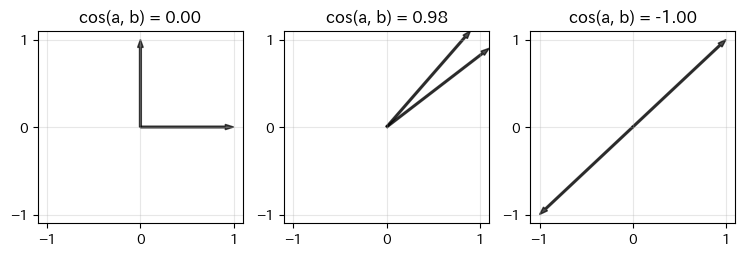

In [156]:
o = np.array([0, 0])
buffer = 0.1
lim = np.array([-1, 1]) * (1 + buffer)
ticks = [-1, 0, 1]

datasets = [
    [np.array([1, 0]), np.array([0, 1])],
    [np.array([1.1, 0.9]), np.array([0.9, 1.1])],
    [np.array([1, 1]), np.array([-1, -1])],
]
m = len(datasets)
fig, axes = plt.subplots(ncols=m, figsize=[m*3, 2.5])
for i in range(m):
    a, b = datasets[i]
    axes[i].arrow(*o, *a, width=0.02, color="black", length_includes_head=True, alpha=0.7)
    axes[i].arrow(*o, *b, width=0.02, color="black", length_includes_head=True, alpha=0.7)
    axes[i].grid(True, alpha=0.3)
    axes[i].set(title=f"cos(a, b) = {cos(a, b):.2f}", xticks=ticks, yticks=ticks, xlim=lim, ylim=lim)

fig.show()

## 直積

2つのベクトル$\boldsymbol{a}, \boldsymbol{b}$のテンソル積

$$
\boldsymbol{a} \circ \boldsymbol{b}
= \boldsymbol{a} \otimes \boldsymbol{b}
= \boldsymbol{a} \boldsymbol{b}^T
= \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix}
\begin{pmatrix}
b_1 & b_2 & \cdots & b_n
\end{pmatrix}
= \begin{pmatrix}
    a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n\\
    a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n\\
    \vdots  & \vdots  & \ddots & \vdots \\
    a_n b_1 & a_n b_2 & \cdots & a_n b_n
\end{pmatrix}
$$

を**直積**（direct product）あるいは**外積**（outer product）という。

:::{card} 行列積と直積の関係

行列$A, B$の$i$番目の列ベクトルを$\boldsymbol{a}_i, \boldsymbol{b}_i$とし、行ベクトルを$\boldsymbol{a}_i^T, \boldsymbol{b}_i^T$とする。このとき、

$$
A^T B = \sum^n_{i=1} \boldsymbol{a}_i \boldsymbol{b}_i^T
$$

が成り立つ。この形式は計量経済学（回帰分析）の漸近正規性の証明などで多用される。
:::

（例）$A, B \in \mathbb{R}^{2\times 2}$のとき、

$$
\begin{align}
A^T B &= 
\begin{pmatrix}
    a_{11} & a_{21}\\
    a_{12} & a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
\\
&= 
\begin{pmatrix}
   a_{11} b_{11} + a_{21} b_{21} & a_{11} b_{12} + a_{21} b_{22}\\
   a_{12} b_{11} + a_{22} b_{21} & a_{12} b_{12} + a_{22} b_{22}\\
\end{pmatrix}
\end{align}
$$

であり、

$$
a_1
= \begin{pmatrix}
    a_{11} \\
    a_{12} 
\end{pmatrix}
, \hspace{1em}
b_1^T = 
\begin{pmatrix}
    b_{11} & b_{12}\\
\end{pmatrix}
$$

から

$$
\begin{align}
\sum^2_{i=1} \boldsymbol{a}_i \boldsymbol{b}_i^T
&= \begin{pmatrix}
    a_{11} \\
    a_{12}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}
\end{pmatrix}
+ \begin{pmatrix}
    a_{21} \\
    a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{21} & b_{22}
\end{pmatrix}
\\
&= \begin{pmatrix}
    a_{11} b_{11} & a_{11} b_{12}\\
    a_{12} b_{11} & a_{12} b_{12}
\end{pmatrix}
+ \begin{pmatrix}
    a_{21} b_{21} & a_{21} b_{22}\\
    a_{22} b_{21} & a_{22} b_{22}
\end{pmatrix}
\end{align}
$$

であるため。

:::{card} 行列積との関係

行列の一部をベクトルで表して（＝ブロック行列）、通常の行列積の定義をベクトルの積の形で表すこともできる

$n$次元正方行列$A, B$の$i$番目の列ベクトルを$\boldsymbol{a}_i, \boldsymbol{b}_i$とし、行ベクトルを$\boldsymbol{a}_i^T, \boldsymbol{b}_i^T$とする。このとき、

$$
\begin{align}
BA &= 
\begin{pmatrix}
    \boldsymbol{b}_{1}^T \\
    \boldsymbol{b}_{2}^T \\
    \vdots \\
    \boldsymbol{b}_{n}^T
\end{pmatrix}
\begin{pmatrix}
    \boldsymbol{a}_1, \boldsymbol{a}_2, \cdots, \boldsymbol{a}_n
\end{pmatrix}
=
\begin{pmatrix}
    \boldsymbol{b}_{1}^T \boldsymbol{a}_1 & \boldsymbol{b}_{1}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{1}^T \boldsymbol{a}_n\\
    \boldsymbol{b}_{2}^T \boldsymbol{a}_1 & \boldsymbol{b}_{2}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{2}^T \boldsymbol{a}_n\\
    \vdots & \vdots & & \vdots\\
    \boldsymbol{b}_{n}^T \boldsymbol{a}_1 & \boldsymbol{b}_{n}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{n}^T \boldsymbol{a}_n\\
\end{pmatrix}
\end{align}
$$
:::

## クロス積

2つのベクトル$\boldsymbol{a}, \boldsymbol{b}$について

$$
\boldsymbol{a} \times \boldsymbol{b}
= \boldsymbol{a} \otimes \boldsymbol{b} - \boldsymbol{b} \otimes \boldsymbol{a}
$$

を**クロス積**（cross product）あるいは**ベクトル積**（vector product）あるいは**外積**という


